# Image Watermarking

## 0. Initialization

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import torch
from watermark.auto_watermark import AutoWatermark
from utils.diffusion_config import DiffusionConfig
from diffusers import StableDiffusionPipeline
from diffusers import DPMSolverMultistepScheduler
from dotenv import load_dotenv

load_dotenv()

model_path = os.getenv("MODEL_PATH")

scheduler = DPMSolverMultistepScheduler.from_pretrained(model_path, subfolder="scheduler")
device = 'cuda' if torch.cuda.is_available() else 'cpu'

diffusion_config = DiffusionConfig(
    scheduler = scheduler,
    pipe = StableDiffusionPipeline.from_pretrained(model_path, scheduler=scheduler).to(device),
    device = device,
    image_size = (512, 512),
    num_inference_steps = 50,
    guidance_scale = 3.5,
    gen_seed = 42,
    inversion_type = "ddim"
)

/home/siluyang/miniconda3/envs/markdiffusion/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 15.60it/s]



## 1. Tree-Ring Watermark

### 1.1. Tree-Ring Watermark Generation & Detection

In [ ]:
mywatermark = AutoWatermark.load('TR', algorithm_config=f'config/TR.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains")

# visualize the watermarked image
watermarked_image.show()

  4%|▍         | 2/50 [00:00<00:02, 17.27it/s]

100%|██████████| 50/50 [00:03<00:00, 13.86it/s]


In [5]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image, guidance_scale=3.0)
print(detection_result)


100%|██████████| 50/50 [00:03<00:00, 13.47it/s]

{'is_watermark': True, 'l1_distance': 18.94269561767578}


In [ ]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

In [ ]:
print(mywatermark.detect_watermark_in_media(watermarked_image, detector_type="p_value"))
print(mywatermark.detect_watermark_in_media(unwatermarked_image, detector_type="p_value"))

### 1.2. Tree-Ring Watermark Visualization

In [ ]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image)

visualizer = AutoVisualizer.load('TR', data_for_visualization=data_for_visualization)

In [ ]:
method_kwargs = [{},{"channel": 0}, {}, {"channel": 0}, {}]
fig = visualizer.visualize(
    rows=1,
    cols=5,
    methods=['draw_pattern_fft', 'draw_orig_latents_fft', 'draw_watermarked_image', 'draw_inverted_latents_fft', 'draw_inverted_pattern_fft'],
    method_kwargs=method_kwargs,
    save_path='TR_watermark_visualization.pdf'
 )

## 2. Gaussian-Shading Watermark

### 2.1. Gaussian-Shading Watermark Generation & Detection

In [ ]:
mywatermark = AutoWatermark.load('GS', algorithm_config=f'config/GS.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains")

# visualize the watermarked image
watermarked_image.show()

In [ ]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image)
print(detection_result)

In [ ]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

### 2.2. Gaussian-Shading Watermark Visualization

In [ ]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image)

visualizer = AutoVisualizer.load('GS', data_for_visualization=data_for_visualization)

In [ ]:
method_kwargs = [{"channel": 0}, {"channel": 0}, {}, {"channel": 0}, {"channel": 0}]

fig = visualizer.visualize(
    rows=1, 
    cols=5, 
    methods=['draw_watermark_bits', 'draw_orig_latents', 'draw_watermarked_image', 'draw_inverted_latents', 'draw_reconstructed_watermark_bits'], 
    method_kwargs=method_kwargs, 
    save_path='GS_watermark_visualization.pdf'
    )

## 3. PRC Watermark

### 3.1. PRC Watermark Generation & Detection 

In [ ]:
mywatermark = AutoWatermark.load('PRC', algorithm_config=f'config/PRC.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains")

# visualize the watermarked image
watermarked_image.show()

In [ ]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image, inv_order=1)
print(detection_result)

In [ ]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

### 3.2. PRC Watermark Visualization

In [ ]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image)

visualizer = AutoVisualizer.load('PRC', data_for_visualization=data_for_visualization)

In [ ]:
method_kwargs = [{}, {"channel": 3}, {}, {"channel": 3}, {}]

fig = visualizer.visualize(
  rows=1,
  cols=5, 
  methods=['draw_codeword', 'draw_orig_latents', 'draw_watermarked_image', 'draw_inverted_latents', 'draw_recovered_codeword'], 
  method_kwargs=method_kwargs, 
  save_path='PRC_watermark_visualization.pdf'
)

## 4. RingID Watermark

### 4.1. RingID Watermark Generation & Detection

In [ ]:
mywatermark = AutoWatermark.load('RI', algorithm_config=f'config/RI.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains")

# visualize the watermarked image
watermarked_image.show()

In [ ]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image)
print(detection_result)

In [ ]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

### 4.2. RingID Watermark Visualization

In [ ]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image)

visualizer = AutoVisualizer.load('RI', data_for_visualization=data_for_visualization)

In [ ]:
method_kwargs = [{}, {"channel": 3}, {}, {"channel": 3}, {}]
fig = visualizer.visualize(
    rows=1, 
    cols=5, 
    methods=['draw_ring_pattern_fft', 'draw_orig_latents_fft', 'draw_watermarked_image', 'draw_inverted_latents_fft', 'draw_heter_pattern_fft'], 
    method_kwargs=method_kwargs, 
    save_path='RI_watermark_visualization.pdf'
)

## 5. SEAL: Semantic Aware Image Watermark

### 5.1. SEAL Watermark Generation & Detection

In [ ]:
mywatermark = AutoWatermark.load('SEAL', algorithm_config=f'config/SEAL.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains")

# visualize the watermarked image
watermarked_image.show()

In [ ]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image)
print(detection_result)

In [ ]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

### 5.2. SEAL Watermark Visualization

In [ ]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image)

visualizer = AutoVisualizer.load('SEAL', data_for_visualization=data_for_visualization)

In [ ]:
method_kwargs = [{}, {"channel": 2}, {}, {"channel": 2}, {}]

fig = visualizer.visualize(
    rows=1, 
    cols=5, 
    methods=['draw_embedding_distributions', 'draw_orig_latents', 'draw_watermarked_image', 'draw_inverted_latents', 'draw_patch_diff'], 
    method_kwargs=method_kwargs, 
    save_path='SEAL_watermark_visualization.pdf'
    )

## 6. WIND: Two-Stage Robust Watermarking for Images

### 6.1. WIND Watermark Generation & Detection

In [ ]:
mywatermark = AutoWatermark.load('WIND', algorithm_config=f'config/WIND.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains")

# visualize the watermarked image
watermarked_image.show()

In [ ]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image)
print(detection_result)

In [ ]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

### 6.2. WIND Watermark Visualization

In [ ]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image)

visualizer = AutoVisualizer.load('WIND', data_for_visualization=data_for_visualization)

In [ ]:
method_kwargs = [{"channel": 2}, {"channel": 2}, {}, {"channel": 2}, {"channel": 2}]

fig = visualizer.visualize(
    rows=1, 
    cols=5, 
    methods=['draw_group_pattern_fft', 'draw_orig_latents_fft', 'draw_watermarked_image', 'draw_inverted_latents_fft', 'draw_inverted_group_pattern_fft'], 
    method_kwargs=method_kwargs, 
    save_path='WIND_watermark_visualization.pdf'
    )

## 7. ROBIN: Robust and Invisible Watermarks for Diffusion Models with Adversarial Optimization

### 7.1. ROBIN WaterMark Generation & Detection

In [ ]:
mywatermark = AutoWatermark.load('ROBIN', algorithm_config=f'config/ROBIN.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains", guidance_scale=7.5)

# visualize the watermarked image
watermarked_image.show()

In [ ]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image)
print(detection_result)

In [ ]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

### 7.2. ROBIN WaterMark Visualization

In [ ]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image)

visualizer = AutoVisualizer.load('ROBIN', data_for_visualization=data_for_visualization)

In [ ]:
method_kwargs = [{}, {"channel": 3}, {}, {"channel": 3}, {}]

fig = visualizer.visualize(
    rows=1, 
    cols=5, 
    methods=['draw_pattern_fft', 'draw_orig_latents_fft', 'draw_watermarked_image', 'draw_inverted_latents_fft', 'draw_inverted_pattern_fft'], 
    method_kwargs=method_kwargs, 
    save_path='ROBIN_watermark_visualization.pdf'
    )

## 8. GaussMarker: Robust Dual-Domain Watermarks for Diffusion Models

### 8.1. GaussMarker WaterMark Generation & Detection

/home/siluyang/MarkDiffusion/watermark/gm/gnr.py:119: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(checkpoint_path, map_location="cpu")
/home/siluyang/mi

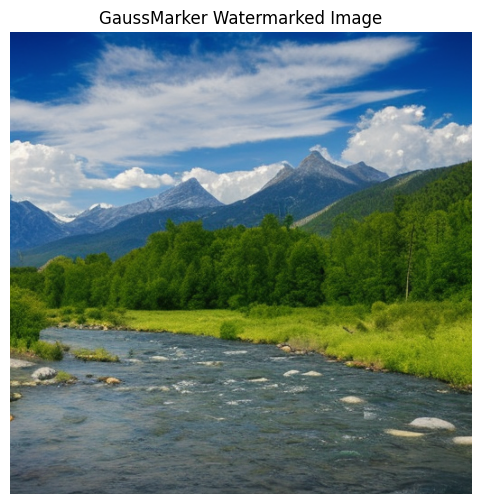

In [ ]:
mywatermark = AutoWatermark.load('GM', algorithm_config=f'config/GM.json',diffusion_config=diffusion_config)

# generate watermarked image
watermarked_image = mywatermark.generate_watermarked_media(input_data="A beautiful landscape with a river and mountains", guidance_scale=7.5)

# visualize the watermarked image
watermarked_image.show()

In [4]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_image)
print(detection_result)

  4%|▍         | 2/50 [00:00<00:03, 13.61it/s]

100%|██████████| 50/50 [00:03<00:00, 13.32it/s]



{'bit_accuracy': 1.0, 'tau_bits': 0.71484375, 'tau_onebit': 0.6484375, 'message_accuracy': 0.8895263671875, 'gnr_bit_accuracy': 1.0, 'gnr_message_accuracy': 0.88873291015625, 'complex_l1': 49.73891830444336, 'frequency_score': -0.4973891830444336, 'decision_bit_accuracy': 1.0, 'decision_threshold': 0.71484375, 'fused_score': 0.9683942129160636, 'fused_threshold': 0.5, 'is_watermark': True, 'gnr_threshold': 0.71484375}


In [5]:
unwatermarked_image = mywatermark.generate_unwatermarked_media(input_data="A beautiful landscape with a river and mountains")
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_image)
print(detection_result)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:03<00:00, 13.56it/s]

100%|██████████| 50/50 [00:03<00:00, 13.19it/s]

{'bit_accuracy': 0.515625, 'tau_bits': 0.71484375, 'tau_onebit': 0.6484375, 'message_accuracy': 0.4971923828125, 'gnr_bit_accuracy': 0.515625, 'gnr_message_accuracy': 0.4971923828125, 'complex_l1': 84.41233825683594, 'frequency_score': -0.8441233825683594, 'decision_bit_accuracy': 0.515625, 'decision_threshold': 0.71484375, 'fused_score': 0.04573723310890633, 'fused_threshold': 0.5, 'is_watermark': False, 'gnr_threshold': 0.71484375}


### 8.2. GaussMarker WaterMark Visualization

In [6]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(watermarked_image)

visualizer = AutoVisualizer.load('GM', data_for_visualization=data_for_visualization)

100%|██████████| 50/50 [00:04<00:00, 12.08it/s]

100%|██████████| 50/50 [00:03<00:00, 13.13it/s]


{}
{}
{}
{}
{}
{}


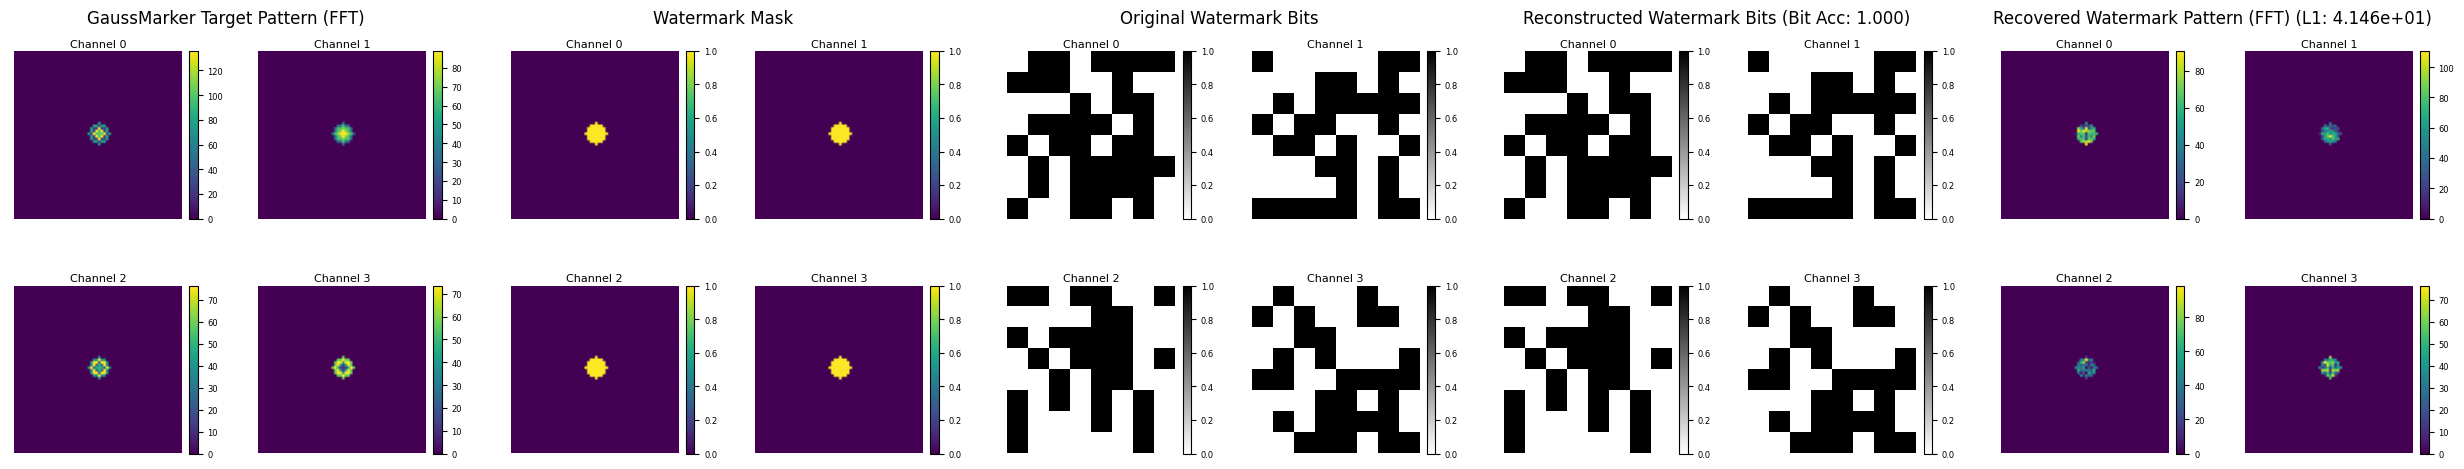

In [ ]:
method_kwargs = [{}, {}, {}, {}, {}]

fig = visualizer.visualize(
    rows=1, 
    cols=5, 
    methods=['draw_pattern_fft', 'draw_watermark_mask', 'draw_watermark_bits', 'draw_reconstructed_watermark_bits', 'draw_inverted_pattern_fft'], 
    method_kwargs=method_kwargs, 
    save_path='GM_watermark_visualization.pdf'
    )

# Video Watermarking

## 0. Initialization

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

import torch
from watermark.auto_watermark import AutoWatermark
from utils.diffusion_config import DiffusionConfig
from diffusers import TextToVideoSDPipeline, StableVideoDiffusionPipeline
from diffusers import DPMSolverMultistepScheduler, DDIMInverseScheduler, DDIMScheduler
from dotenv import load_dotenv
load_dotenv()

model_path = os.getenv('T2V_MODEL_PATH')

scheduler = DDIMScheduler.from_pretrained(model_path, subfolder="scheduler")
device = 'cuda' if torch.cuda.is_available() else 'cpu'

pipe = TextToVideoSDPipeline.from_pretrained(
    model_path, 
    scheduler=scheduler,
    torch_dtype=torch.float16 if device == 'cuda' else torch.float32
).to(device)
diffusion_config = DiffusionConfig(
    pipe = pipe,
    scheduler = scheduler,
    device = device,
    image_size = (256, 256),        
    num_inference_steps = 25,       
    guidance_scale = 7.5,           
    gen_seed = 42,                  
    init_latents_seed= 36,         
    num_frames = 16,                
    inversion_type = "ddim"         
)
print(pipe.device)

In [ ]:
import matplotlib.pyplot as plt
def display_frame(frame, title="Generated Frame"):
    plt.figure(figsize=(8, 8))
    plt.imshow(frame)
    plt.axis('off')
    plt.title(title)
    plt.show()

## 1. VideoShield Watermark

### 1.1 VideoShield Watermark Generation & Detection

In [ ]:
mywatermark = AutoWatermark.load('VideoShield', algorithm_config=f'config/VideoShield.json', diffusion_config=diffusion_config)

unwatermarked_video = mywatermark.generate_unwatermarked_media(input_data="a dog running in the park")

watermarked_video = mywatermark.generate_watermarked_media(input_data="a dog running in the park", num_frames=16)
display_frame(watermarked_video[0], "Watermarked Video Frame")
display_frame(watermarked_video[5], "Watermarked Video Frame")
display_frame(watermarked_video[10], "Watermarked Video Frame")
display_frame(watermarked_video[15], "Watermarked Video Frame")


In [ ]:
detection_result = mywatermark.detect_watermark_in_media(watermarked_video, detector_type='bit_acc')
print("Watermarked test result:", detection_result)
    
detection_result = mywatermark.detect_watermark_in_media(unwatermarked_video, detector_type='bit_acc')
print("Unwatermarked test result:", detection_result)

### 1.2. VideoShield Watermark Visualization

In [ ]:
from visualize.auto_visualization import AutoVisualizer

data_for_visualization = mywatermark.get_data_for_visualize(
    video_frames=watermarked_video,
    prompt="",
    guidance_scale=1.0,
    num_inference_steps=25,
)
visualizer = AutoVisualizer.load('VideoShield', data_for_visualization=data_for_visualization)

In [ ]:
method_kwargs = [{"channel": 1}, {"channel": 1}, {"num_frames": 4}, {"channel": 1}, {"channel": 1}]

fig = visualizer.visualize(
    rows=1, 
    cols=5, 
    methods=['draw_watermark_bits', 'draw_orig_latents', 'draw_watermarked_video_frames', 'draw_inverted_latents', 'draw_reconstructed_watermark_bits'], 
    method_kwargs=method_kwargs, 
    save_path='VideoShield_watermark_visualization.pdf'
    )